# Classification des entreprises



In [1]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Chargement des données

In [2]:
#referentiel base source
source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_entreprise.shape

(8095, 330)

In [3]:
colonnes = list(source_entreprise.columns)
for colonne in colonnes:
    print(colonne)

Unnamed: 0
Unnamed: 0_x
ape_code
siren
siret
capital
enrollment
last_number_of_employees
employees_number_for_linkedin
revenue_2021
revenue_2020
revenue_2019
revenue_2018
net_result_2021
equity_2021
roe_2021
net_debt_2021
current_assets_2021
current_liabilities_2021
solvability_ratio_2021
gross_operating_ebitda_2021
gross_operating_ebitda_ratio_2021
reimbursement_ratio_2021
robustness_ratio_2021
net_result_2020
equity_2020
roe_2020
net_debt_2020
current_assets_2020
current_liabilities_2020
solvability_ratio_2020
gross_operating_ebitda_2020
gross_operating_ebitda_ratio_2020
reimbursement_ratio_2020
robustness_ratio_2020
net_result_2019
equity_2019
roe_2019
net_debt_2019
current_assets_2019
current_liabilities_2019
solvability_ratio_2019
gross_operating_ebitda_2019
gross_operating_ebitda_ratio_2019
reimbursement_ratio_2019
robustness_ratio_2019
net_result_2018
equity_2018
roe_2018
net_debt_2018
current_assets_2018
current_liabilities_2018
solvability_ratio_2018
gross_operating_ebitda_201

In [17]:
source_entreprise_extract=source_entreprise[['ape_code','revenue_2022','resultat_exploitation_ratio_2022','last_number_of_employees','enrollment',
                                             'equity_2022','current_assets_2022',
                                             'gross_operating_ebitda_ratio_2022','net_result_2022','current_liabilities_2022',
                                             'capital','roe_2022','indeed_job_results_count','google_business_notation',
                                             'additional_info_region_code','net_debt_2022','reimbursement_ratio_2022',
                                             'siren','commercial_name','siret','robustness_ratio_2022','glassdoor_notation',
                                             'societeinfo_growth_ratio_2022','gross_operating_ebitda_2022','region_index',
                                             'resultat_d_exploitation_2022','solvability_ratio_2022','type_ent',
                                             'resultat_exploitation_ratio','net_result','current_assets','equity',
                                             'current_liabilities','revenue','robustness_ratio','solvability_ratio',
                                             'net_debt','gross_operating_ebitda','gross_operating_ebitda_ratio','CAGR_18_22',
                                             'RCI_2022','RCI','total_fonds','equity_costs','taux de recrutement',
                                             'RdtCpx_2022','RdtCpx','FRN_2022','FRN','reimbursement_ratio','RCI_21_22',
                                             'capital_moy_sect','enrollment_moy_sect','last_number_of_employees_moy_sect',
                                             'employees_number_for_linkedin_moy_sect','revenue_2022_moy_sect',
                                             'net_result_2022_moy_sect','equity_2022_moy_sect','roe_2022_moy_sect',
                                             'net_debt_2022_moy_sect','current_assets_2022_moy_sect',
                                             'current_liabilities_2022_moy_sect','solvability_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_2022_moy_sect','gross_operating_ebitda_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_ratio_moy_sect','reimbursement_ratio_2022_moy_sect',
                                             'robustness_ratio_2022_moy_sect','societeinfo_growth_ratio_2022_moy_sect',
                                             'resultat_exploitation_ratio_2022_moy_sect','resultat_d_exploitation_2022_moy_sect',
                                             'resultat_exploitation_ratio_moy_sect','net_result_moy_sect','current_assets_moy_sect',
                                             'equity_moy_sect','current_liabilities_moy_sect','revenue_moy_sect',
                                             'reimbursement_ratio_moy_sect','robustness_ratio_moy_sect','solvability_ratio_moy_sect',
                                             'net_debt_moy_sect','gross_operating_ebitda_moy_sect','CAGR_18_22_moy_sect',
                                             'RCI_2022_moy_sect','RCI_moy_sect','total_fonds_moy_sect','equity_costs_moy_sect',
                                             'enrollment_sum','last_number_of_employees_sum','employees_number_for_linkedin_sum',
                                             'revenue_2022_sum','roe_2022_sum','net_debt_2022_sum','gross_operating_ebitda_2022_sum',
                                             'resultat_d_exploitation_2022_sum','net_result_sum','revenue_sum','net_debt_sum',
                                             'pdm','pdm_2022']]

KeyError: "['indeed_job_results_count', 'google_business_notation', 'additional_info_region_code', 'commercial_name', 'glassdoor_notation', 'region_index', 'type_ent', 'taux de recrutement', 'FRN_2022', 'FRN'] not in index"

In [ ]:
colonnes = list(source_entreprise_extract.columns)
for colonne in colonnes:
    print(colonne)

In [ ]:
# Remplacez 'source_entreprise_extract' par le nom réel de votre DataFrame
source_entreprise_extract = source_entreprise_extract.copy()

# Liste des colonnes pour lesquelles limiter les valeurs extrêmes
columns = ['societeinfo_growth_ratio_2022', 'societeinfo_growth_ratio_2022_moy_sect', 'solvability_ratio_2022', 'robustness_ratio_2022',
           'gross_operating_ebitda_ratio_2022', 'CAGR_18_22', 'reimbursement_ratio_2022']

# Remplacer les valeurs extrêmes pour chaque colonne
for col in columns:
    lower_bound = source_entreprise_extract[col].quantile(0.01)
    upper_bound = source_entreprise_extract[col].quantile(0.99)
    source_entreprise_extract[col] = source_entreprise_extract[col].clip(lower=lower_bound, upper=upper_bound)

# Affichez le nouveau résumé des statistiques pour vérifier les changements
for col in columns:
    print(f"{col} après remplacement des valeurs extrêmes:")
    print(source_entreprise_extract[col].describe())
    print("\n")  # Ajoute un espace entre les descriptions pour plus de clarté

In [ ]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(30)]  # Range de 0 à 140% par tranche de 15%

sns.displot(data=source_entreprise_extract, x='societeinfo_growth_ratio_2022', bins=25, kde=True) 
plt.title("repartition par taux de croissance 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [ ]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(200)]  

sns.displot(data=source_entreprise_extract, x='solvability_ratio_2022', bins=25, color='red',kde=True) 
plt.title("repartition par ratio de solvabilité 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [ ]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(500)]  

sns.displot(data=source_entreprise_extract, x='reimbursement_ratio_2022', color='green', bins=25, kde=True) 
plt.title("repartition par ratio d endettement 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [ ]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.025 * i for i in range(50)]  

sns.displot(data=source_entreprise_extract, x='gross_operating_ebitda_ratio_2022', color='orange', bins=25, kde=True) 
plt.title("repartition par EBITDA 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [ ]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.03 * i for i in range(40)]  

sns.displot(data=source_entreprise_extract, x='robustness_ratio_2022', color='darkblue', bins=25, kde=True) 
plt.title("repartition par ratio de robustesse 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [ ]:
#referentiel base secteur
source_secteur=pd.read_csv('base_secteur_initiale.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_secteur.shape

In [ ]:
# classification manuelle de base source

def attribuer_classification(source_entreprise_extract):
    # Initialise la nouvelle colonne 'classification'
    source_entreprise_extract['classification'] = 'Non classifié'  # Valeur par défaut
    
    # Conditions pour 'Pépite'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05) & (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5) &
        (source_entreprise_extract['CAGR_18_22'] > 0.03) & (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2) &
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07) & (source_entreprise_extract['solvability_ratio_2022'] > 1.5),
        'classification'] = 'Pépite'
    
    # Conditions pour 'À risque'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0) & (source_entreprise_extract['CAGR_18_22'] <=0) &
        (source_entreprise_extract['solvability_ratio_2022'] <= 1) ,
        'classification'] = 'À risque'
    
    # Conditions pour 'À surveiller'
    
    conditions_surveiller = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] > 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] < 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] < 0.10).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] < 0.02).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] < 1).astype(int) )
        
    source_entreprise_extract.loc[(conditions_surveiller >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] = 'À surveiller'
    
    # Conditions pour 'À potentiel'
    
    conditions_potentiel = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] > 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] > 1.5).astype(int))
    
    source_entreprise_extract.loc[(conditions_potentiel >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] = 'À potentiel'
    
    # Retourne le DataFrame modifié
    return source_entreprise_extract

# Applique la fonction

source_entreprise_extract = attribuer_classification(source_entreprise_extract)


In [ ]:
à_risque=source_entreprise_extract[source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0]
à_risque=à_risque[['societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']]
à_risque.head(100)

In [ ]:
## CLASSEMENT MANUEL

In [ ]:

plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= source_entreprise_extract)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
panel_classifié =source_entreprise_extract[source_entreprise_extract['classification']!='Non classifié']


In [ ]:
panel_classifié .shape

In [ ]:
panel_non_classifié =source_entreprise_extract[source_entreprise_extract['classification']=='Non classifié']


In [ ]:
panel_non_classifié .shape

In [ ]:
nombre_par_categorie = source_entreprise_extract['classification'].value_counts()
print(nombre_par_categorie)

In [ ]:
## CONSTITUTION DES DATAS DE TEST ET D 'ENTRAINEMENT'

In [ ]:
features = panel[['societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']]

In [ ]:
features.shape

In [ ]:
valeur_attendue = panel_classifié[['classification']]

In [ ]:
valeur_attendue.shape

## Affichage des correlations entre criteres

In [ ]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='solvability_ratio_2022',y='robustness_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('solvabilité 2022')
plt.ylabel('robustesse 2022')
plt.title('Distribution solvabilité / robustesse')

In [ ]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='reimbursement_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('endettement 2022')
plt.title('Distribution croissance / endettement')

In [ ]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='gross_operating_ebitda_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('EBITDA 2022')
plt.title('Distribution croissance / rentabilité')

## Modele de classification



In [ ]:
# Identifier les colonnes avec des valeurs NaN
nan_counts = features.isna().sum()

# Afficher le nombre de valeurs NaN par colonne
print(nan_counts)

In [ ]:
# Supprimer les lignes contenant des NaN
cleaned_data = features.dropna()
cleaned_labels = valeur_attendue.loc[cleaned_data.index]  # Assurez-vous que les étiquettes correspondent aux données nettoyées

In [ ]:

# Préparation des données
X = cleaned_data
y = cleaned_labels

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Avant de supprimer les lignes, assurez-vous que la longueur des ensembles X et y est la même
# Siaucune erreur, cela signifie que les assertions sont passées : les longueurs de X_train et y_train sont identiques, 
# de même que celles de X_test et y_test. Il n'y a pas de "résultat" au sens habituel à voir ; 
# l'absence d'erreur est en elle-même le résultat indiquant que les conditions d'assertion sont remplies.


assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [ ]:
# presence de NaN dans y_train / y_test
unique_categories_y_train = np.unique(y_train)
print("Catégories uniques dans y_train:", unique_categories_y_train)

unique_categories_y_test = np.unique(y_test)
print("Catégories uniques dans y_test:", unique_categories_y_test)


In [ ]:
# Identifier les colonnes avec des valeurs NaN pour les DataFrames
nan_counts_X_train = X_train.isna().sum()
nan_counts_X_test = X_test.isna().sum()
print("NaN dans X_train:", nan_counts_X_train)
print("NaN dans X_test:", nan_counts_X_test)

In [ ]:
# Choix du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Pépite :

# Précision (Precision) : 100% signifie que toutes les prédictions de la classe "Pépite" étaient correctes. Cependant, cela doit être interprété avec prudence en raison du petit nombre d'échantillons.
# Rappel (Recall) : 20% signifie que seulement 20% des vraies "Pépite" ont été correctement identifiées par le modèle. Cela indique une faiblesse dans la capacité du modèle à détecter cette classe spécifique.
# Score F1 : 33% est assez bas, ce qui reflète le déséquilibre entre la précision et le rappel pour cette classe.

# À potentiel :

# Précision : 95% est excellent et indique que la grande majorité des prédictions pour cette classe étaient correctes.
# Rappel : 90% est également très bon, indiquant que le modèle a réussi à identifier la majorité des cas réels "À potentiel".
# Score F1 : 93% est un excellent score, indiquant un bon équilibre entre précision et rappel.

# À surveiller :

# Précision : 97% montre que presque toutes les entreprises classées comme "À surveiller" l'étaient à juste titre.
# Rappel : 100% indique que toutes les entreprises réellement à surveiller ont été détectées par le modèle.
# Score F1 : 98% est exceptionnellement élevé, reflétant d'excellentes performances à la fois en termes de précision et de rappel.

In [ ]:

# Rééchantillonnage des ensembles de données X_train et y_train
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vous pouvez maintenant utiliser X_train_resampled et y_train_resampled pour entraîner votre modèle

# Entraînement du modèle
model.fit(X_train_resampled, y_train_resampled)


In [ ]:
# Ajustement des pénalités de classe

# Créer le modèle avec des poids de classe équilibrés
model = RandomForestClassifier(n_estimators=200, random_state=84, class_weight='balanced')

# Entraîner le modèle avec les données rééchantillonnées
model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Évaluation du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Initialiser le LabelEncoder
le = LabelEncoder()

# Encoder les étiquettes de l'ensemble d'entraînement et de test (categorie Classification)
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.transform(y_test)

In [5]:


# Création et entraînement du modèle XGBoost
xgb_model = XGBClassifier(random_state=84, scale_pos_weight=5)  # Ajustez scale_pos_weight si nécessaire
xgb_model.fit(X_train_resampled, y_train_encoded)

NameError: name 'X_train_resampled' is not defined

In [6]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))

NameError: name 'X_test' is not defined

In [7]:
# Classe 0 (probablement "Pépite") :

# Précision : 100% indique que toutes les prédictions de cette classe étaient correctes. Cependant, comme il s'agit d'un petit échantillon (seulement 5 instances), cette métrique peut être trompeuse.
# Rappel : 40% signifie que le modèle n'a correctement identifié que 40% des instances réelles de cette classe. Cela indique que le modèle a des difficultés à détecter cette classe, probablement en raison de sa faible représentation dans les données.
# Score F1 : 57% est une moyenne harmonique entre la précision et le rappel, indiquant que le modèle n'est pas très performant pour cette classe.

# Classe 1 (probablement "À potentiel") :

# Précision : 94% est très bon, indiquant que la majorité des prédictions pour cette classe étaient correctes.
# Rappel : 99% est excellent, montrant que le modèle a réussi à identifier presque toutes les instances réelles de cette classe.
# Score F1 : 96% est également excellent, reflétant un bon équilibre entre la précision et le rappel pour cette classe.

# Classe 2 (probablement "À surveiller") :

# Précision : 100% est exceptionnel, signifiant que toutes les prédictions de cette classe étaient correctes.
# Rappel : 99% est également exceptionnel, indiquant que le modèle a identifié presque toutes les instances réelles de cette classe.
# Score F1 : 99% montre que le modèle est extrêmement performant pour cette classe.

# Classe 3 (probablement "risque") :
# Précision : 98% est exceptionnel, signifiant que toutes les prédictions de cette classe étaient correctes.
# Rappel : 99% est également exceptionnel, indiquant que le modèle a identifié presque toutes les instances réelles de cette classe.
# Score F1 : 98% montre que le modèle est extrêmement performant pour cette classe.

In [8]:

company_ids = panel_non_classifié['siren'].copy()  # Copiez les identifiants pour les utiliser plus tard

# supprimez les colonnes non nécessaires pour XGBoost, sans toucher à 'company_id'
cols_to_keep = ['siren','societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']
X_full = panel_non_classifié[cols_to_keep]
X_full.head(5)

NameError: name 'panel_non_classifié' is not defined

In [9]:
# Séparer les identifiants et les caractéristiques
company_ids = X_full['siren'].copy()  # Conservez les identifiants
X_full = X_full.drop(columns=['siren'])  # Supprimez l'identifiant pour la prédiction

NameError: name 'X_full' is not defined

In [10]:

# Utilisez le modèle pour faire des prédictions sur l'ensemble de données complet.
y_full_pred = xgb_model.predict(X_full)

# décoder les prédictions pour revenir aux étiquettes originales :
y_full_pred_decoded = le.inverse_transform(y_full_pred)

NameError: name 'X_full' is not defined

In [11]:
# Créer un DataFrame pour les résultats
results_df = pd.DataFrame({'siren': company_ids, 'classification': y_full_pred_decoded})

# Fusionner les prédictions avec le DataFrame initial
merged_df = pd.merge(affectation_non_classifié, results_df, on='siren', how='left')

NameError: name 'company_ids' is not defined

In [12]:
merged_df.head(5)

NameError: name 'merged_df' is not defined

In [13]:
print(merged_df.columns)

NameError: name 'merged_df' is not defined

In [14]:
merged_df = merged_df.drop(columns=['classification_x'])
merged_df = merged_df.rename(columns={'classification_y': 'classification'})

NameError: name 'merged_df' is not defined

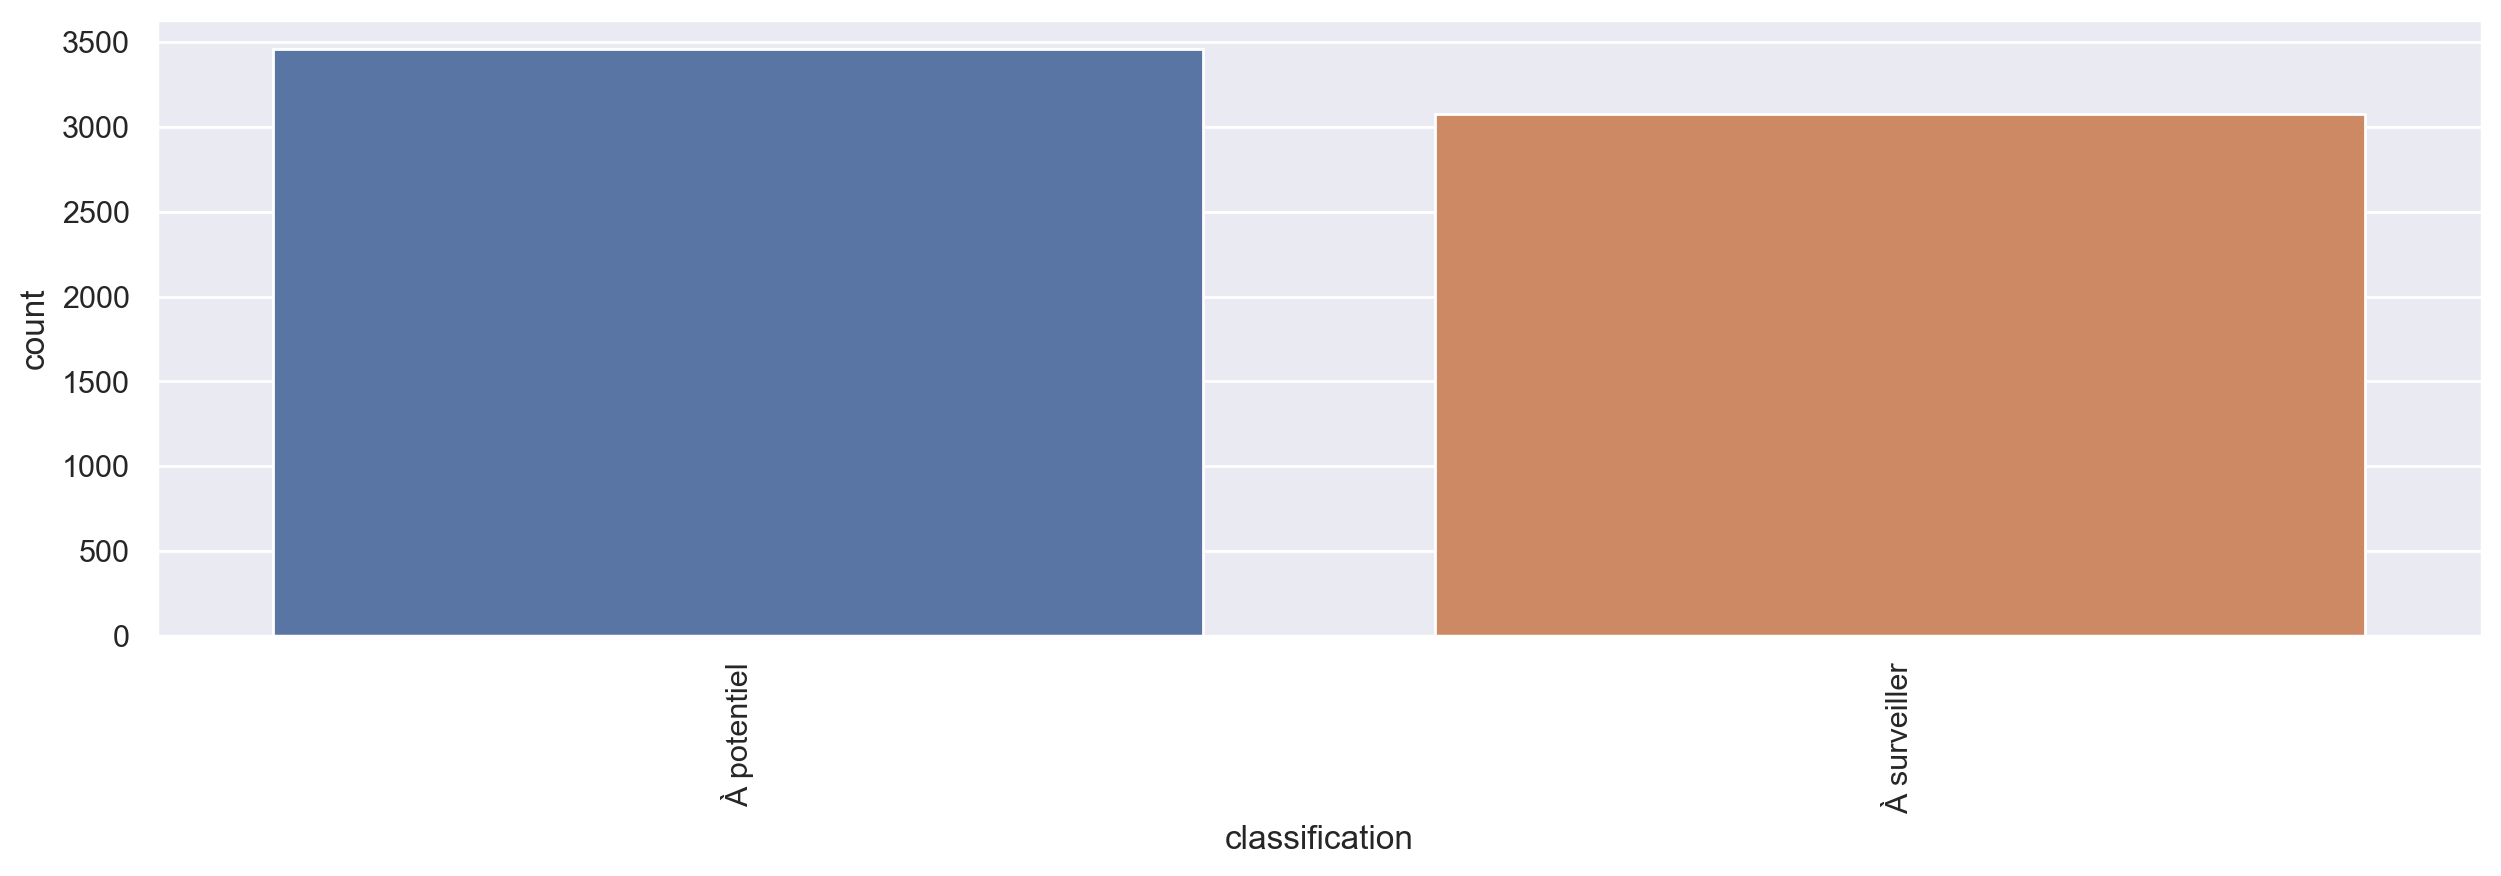

In [576]:

plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= merged_df)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [577]:
nombre_par_categorie = merged_df['classification'].value_counts()
print(nombre_par_categorie)

classification
À potentiel     3458
À surveiller    3075
Name: count, dtype: int64


In [578]:
# reconstituer le fichier complet

# Fusionner avec des suffixes pour identifier les colonnes en double
new_panel = pd.concat([merged_df, panel_classifié])


In [579]:
nombre_par_categorie = merged_df['classification'].value_counts()
print(nombre_par_categorie)

classification
À potentiel     3458
À surveiller    3075
Name: count, dtype: int64


In [580]:
nombre_par_categorie = panel_classifié['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    1362
À potentiel      565
À risque          29
Pépite            27
Name: count, dtype: int64


In [581]:
nombre_par_categorie = new_panel['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    4437
À potentiel     4023
À risque          29
Pépite            27
Name: count, dtype: int64


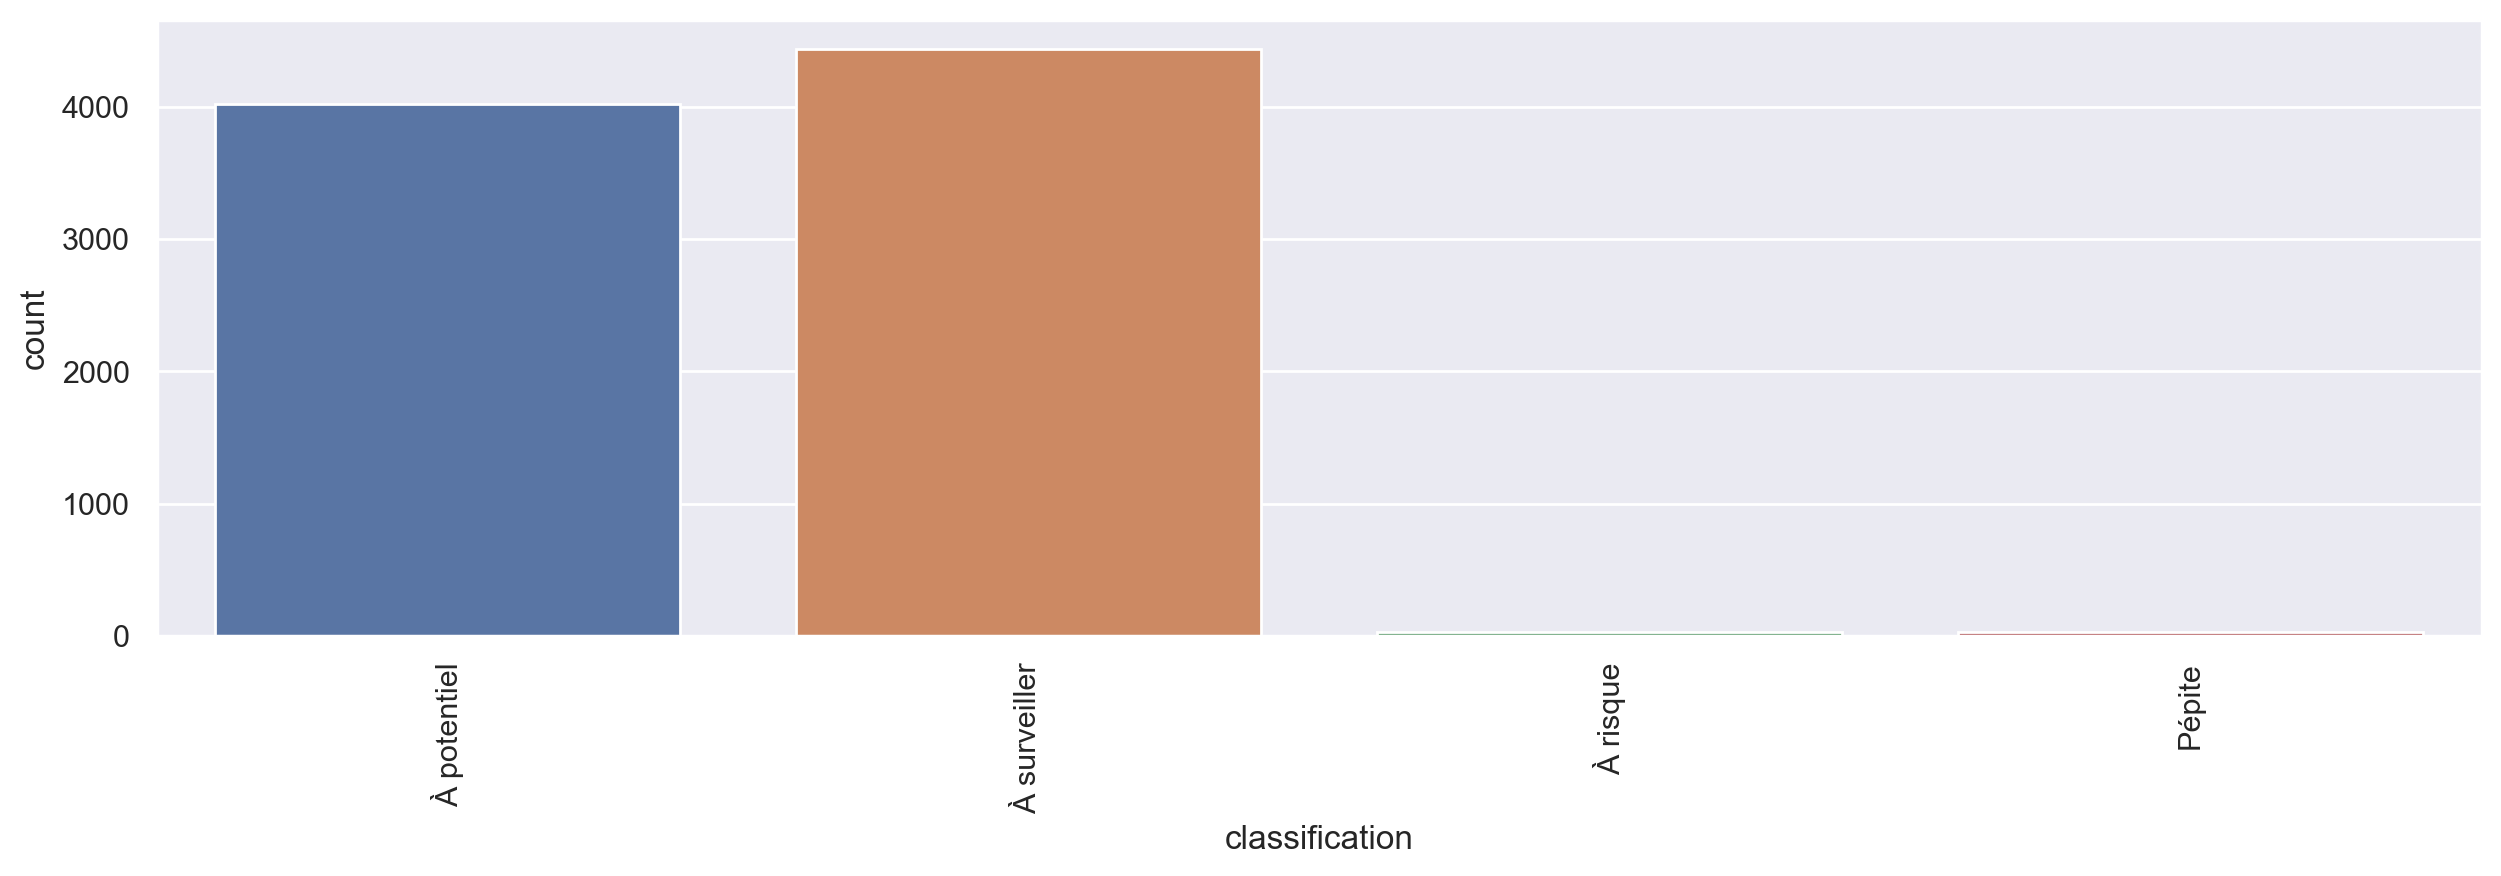

In [582]:
plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= new_panel)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [583]:
nombre_par_categorie = new_panel['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    4437
À potentiel     4023
À risque          29
Pépite            27
Name: count, dtype: int64


In [584]:
new_panel.shape

(8516, 104)

In [585]:
# Filtrer le DataFrame pour ne garder que les données des classifications '

filtered_panel_risque = new_panel[new_panel['classification'].isin(['À risque', 'À surveiller'])]
filtered_panel_risque.to_csv('echantillon_risque_et_surveillé.csv', index='siren')

filtered_panel_opps = new_panel[new_panel['classification'].isin(['Pépite', 'À potentiel'])]
filtered_panel_opps.to_csv('echantillon_pepite_et_potentiel.csv', index='siren')

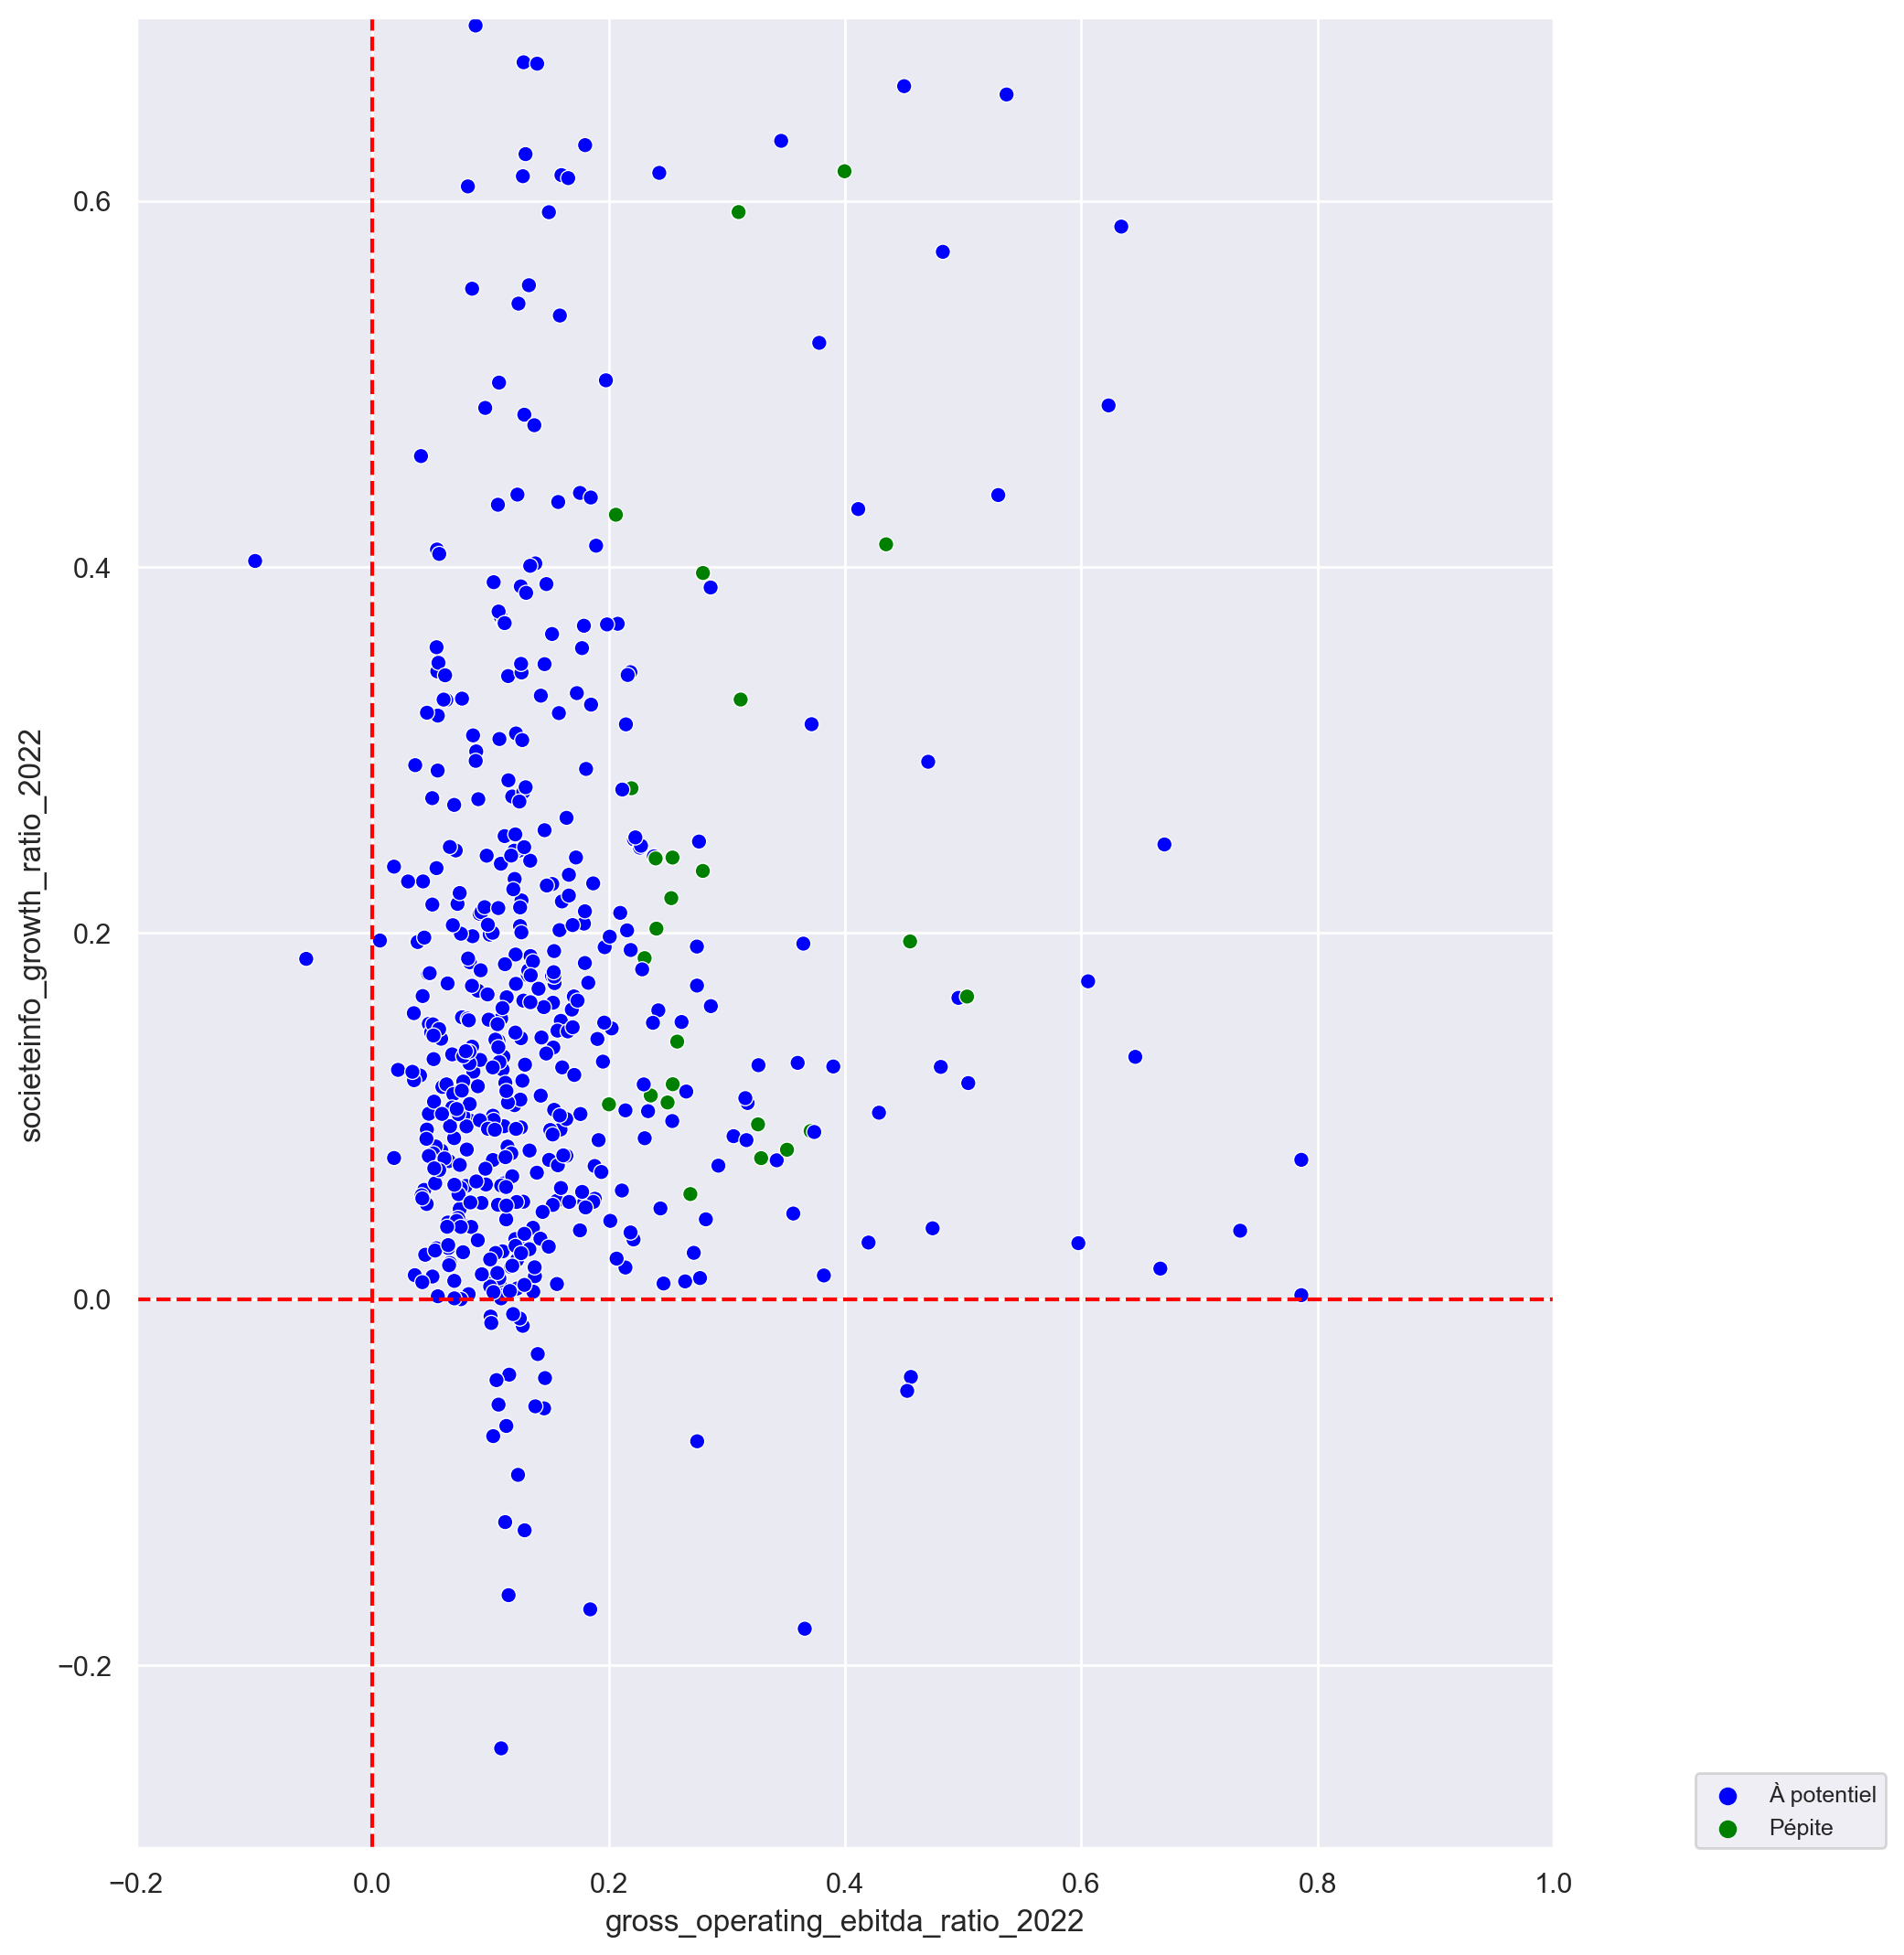

In [586]:
# nuage des entreprises classifiées

plt.figure(figsize=(10,13),dpi=200)
# Définir les couleurs spécifiques pour chaque classification
couleurs = {'Pépite': 'green', 'À potentiel': 'blue'}
ax=sns.scatterplot(x='gross_operating_ebitda_ratio_2022',y='societeinfo_growth_ratio_2022',data=filtered_panel_opps,hue='classification', palette=couleurs)

# La méthode legend() est appelée sur l'objet ax (qui représente les axes du graphique). 
# L'argument loc=(1.1, 0.5) spécifie l'emplacement de la légende par rapport au cadre du graphique, 
# où 1.1 décale la légende à droite du graphique (1 étant juste à la limite droite) 
# et 0.5 positionne la légende au milieu sur l'axe vertical.

ax.axvline(x=0, color='red', linestyle='--')
ax.set_xlim(-0.2,1)
ax.set_ylim(-0.3,0.7)
ax.axhline(y=0, color='red', linestyle='--')
ax.legend(loc=(1.1,0),fontsize=9)
plt.show()

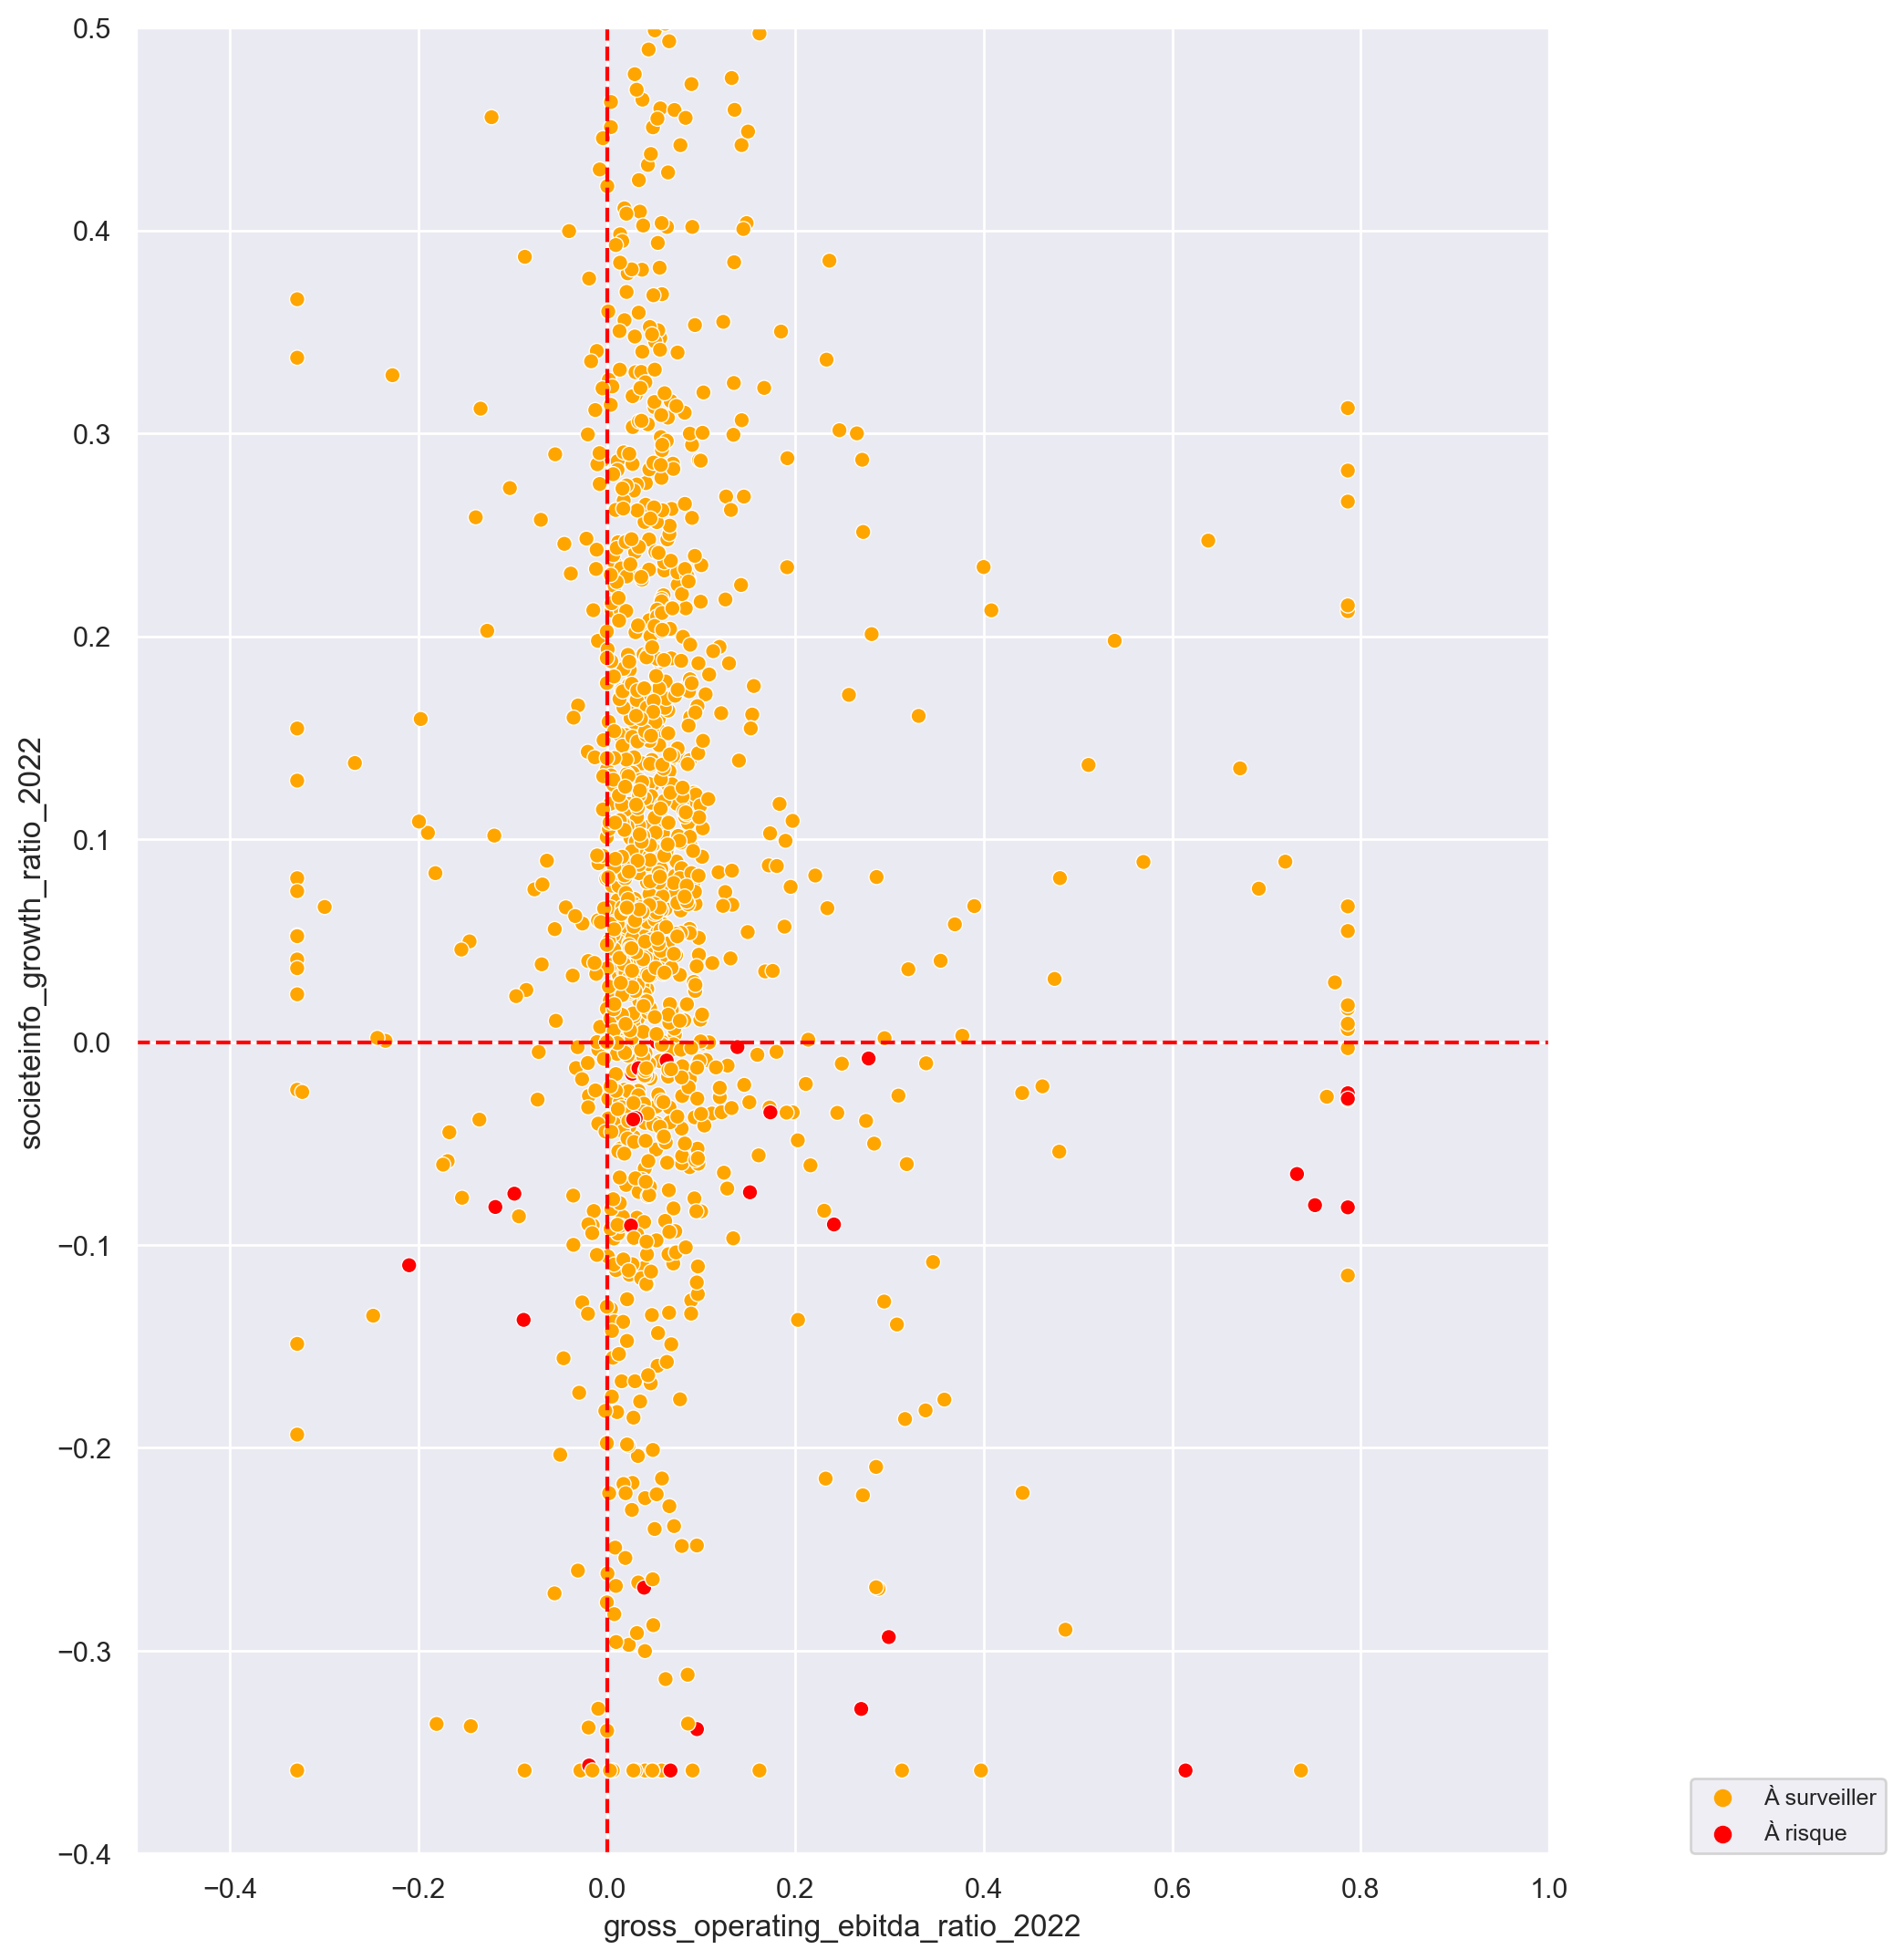

In [587]:
# nuage des entreprises classifiées

plt.figure(figsize=(10,13),dpi=200)
# Définir les couleurs spécifiques pour chaque classification
couleurs = {'À risque': 'red', 'À surveiller': 'orange'}
ax=sns.scatterplot(x='gross_operating_ebitda_ratio_2022',y='societeinfo_growth_ratio_2022',data=filtered_panel_risque,hue='classification', palette=couleurs)

# La méthode legend() est appelée sur l'objet ax (qui représente les axes du graphique). 
# L'argument loc=(1.1, 0.5) spécifie l'emplacement de la légende par rapport au cadre du graphique, 
# où 1.1 décale la légende à droite du graphique (1 étant juste à la limite droite) 
# et 0.5 positionne la légende au milieu sur l'axe vertical.

ax.axvline(x=0, color='red', linestyle='--')
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.4,0.5)
ax.axhline(y=0, color='red', linestyle='--')
ax.legend(loc=(1.1,0),fontsize=9)
plt.show()

In [588]:
new_panel.to_csv('base_source_classifié.csv', index='siren')